In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pyiso
from palettable.colorbrewer.qualitative import Dark2_8

from pyiso import client_factory
from datetime import date
import datetime
%matplotlib inline

In [2]:
caiso = client_factory('caiso')

In [3]:
load14 = pd.DataFrame(caiso.get_load(start_at=datetime.datetime(2018,9,14),end_at=datetime.datetime(2018,9,15)))
load13 = pd.DataFrame(caiso.get_load(start_at=datetime.datetime(2018,9,13),end_at=datetime.datetime(2018,9,14)))
load12 = pd.DataFrame(caiso.get_load(start_at=datetime.datetime(2018,9,12),end_at=datetime.datetime(2018,9,13)))
load11 = pd.DataFrame(caiso.get_load(start_at=datetime.datetime(2018,9,11),end_at=datetime.datetime(2018,9,12)))
load10 = pd.DataFrame(caiso.get_load(start_at=datetime.datetime(2018,9,10),end_at=datetime.datetime(2018,9,11)))
load9 = pd.DataFrame(caiso.get_load(start_at=datetime.datetime(2018,9,9),end_at=datetime.datetime(2018,9,10)))
load8 = pd.DataFrame(caiso.get_load(start_at=datetime.datetime(2018,9,8),end_at=datetime.datetime(2018,9,9)))


caiso: retrying in 5 seconds (5 retries remaining), throttled for http://oasis.caiso.com/oasisapi/SingleZip, {'params': {'market_run_id': 'RTM', 'queryname': 'SLD_FCST', 'version': 1, 'startdatetime': '20180913T07:00-0000', 'enddatetime': '20180914T07:00-0000'}}
caiso: retrying in 5 seconds (5 retries remaining), throttled for http://oasis.caiso.com/oasisapi/SingleZip, {'params': {'market_run_id': 'RTM', 'queryname': 'SLD_FCST', 'version': 1, 'startdatetime': '20180912T07:00-0000', 'enddatetime': '20180913T07:00-0000'}}
caiso: retrying in 5 seconds (5 retries remaining), throttled for http://oasis.caiso.com/oasisapi/SingleZip, {'params': {'market_run_id': 'RTM', 'queryname': 'SLD_FCST', 'version': 1, 'startdatetime': '20180911T07:00-0000', 'enddatetime': '20180912T07:00-0000'}}
caiso: retrying in 5 seconds (5 retries remaining), throttled for http://oasis.caiso.com/oasisapi/SingleZip, {'params': {'market_run_id': 'RTM', 'queryname': 'SLD_FCST', 'version': 1, 'startdatetime': '20180910T

In [4]:
loads = [load8,load9,load10,load11,load12,load13,load14]

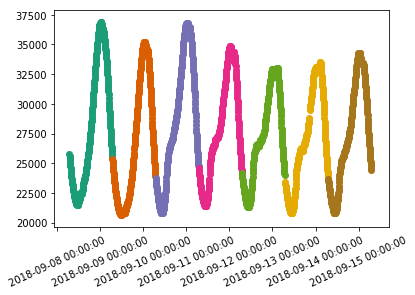

In [5]:
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
plt.xticks(rotation=25)
ax=plt.gca()
ax.set_prop_cycle('color', Dark2_8.mpl_colors)

ax.xaxis.set_major_formatter(xfmt)
for i in loads:
    ax.scatter(i['timestamp'].dt.to_pydatetime(),i['load_MW'])

plt.show()

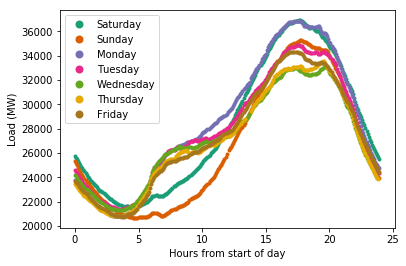

In [20]:
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
plt.xticks(rotation=0)
ax=plt.gca()
ax.set_prop_cycle('color', Dark2_8.mpl_colors)

for i in loads:
    ax.plot((i['timestamp']-i['timestamp'].min())/np.timedelta64(1, 'h'),i['load_MW'],label= i['timestamp'].min().day_name(),marker='o',
        linewidth=0, markersize=4,markeredgewidth=0)

ax.set_xlabel('Hours from start of day')
ax.set_ylabel('Load (MW)')

lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10,markerscale=2)

plt.show()